# Making a new hybrid grid file

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## Open existing hycom1 file and vcoord file

In [2]:
ds_hycom = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/hycom1_75_800m.nc")
ds_vcoord = xr.open_dataset("/g/data/x77/ahg157/inputs/mom6/panan/vcoord.nc")

In [19]:
dz_KDS75 = np.diff(ds_vcoord.st_edges_ocean.values)

In [24]:
## FNC1 code:
dz_min = 1.082
h_total=4000
power = 4.5
nk = 75

dz=np.zeros(nk)

for k in range(nk):
    dz[k] = ((k)/(nk))**power
    
dz = ( h_total - (nk) * dz_min ) * ( dz / np.sum(dz) ) #! Rescale to so total is H_total
dz[-1] = dz[-1] + ( h_total - np.sum( dz + dz_min ) ) #! Adjust bottommost layer
dz = dz + dz_min #! Finally add in the constant dz_min

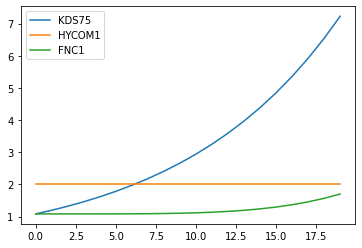

In [25]:
plt.plot(dz_KDS75[:20],label='KDS75')
plt.plot(ds_hycom.dz[:20],label='HYCOM1')
plt.plot(dz[:20],label='FNC1')
plt.legend()

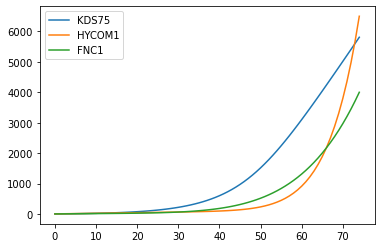

In [26]:
plt.plot(np.cumsum(dz_KDS75),label='KDS75')
plt.plot(np.cumsum(ds_hycom.dz),label='HYCOM1')
plt.plot(np.cumsum(dz),label='FNC1')
plt.legend()

In [10]:
ds_hycom['dz'].values = dz
#ds_hycom.to_netcdf('/g/data/x77/amh157/hycom1_kds75.nc')
ds_hycom.to_netcdf('/g/data/x77/ahg157/inputs/mom6/panan/hycom1_kds75.nc')

In [23]:
dz_KDS75

array([  1.08256153,   1.1963463 ,   1.32208964,   1.46104803,
         1.61460985,   1.78430915,   1.97184093,   2.17907793,
         2.40808915,   2.66116026,   2.94081615,   3.24984568,
         3.59132893,   3.96866713,   4.38561553,   4.84631938,
         5.35535331,   5.9177642 ,   6.53911786,   7.22554959,
         7.98381854,   8.82136609,   9.74637771,  10.76784799,
        11.89564807,  13.14059397,  14.51451421,  16.03031371,
        17.70203027,  19.54487822,  21.57527196,  23.81081985,
        26.27027566,  28.97343137,  31.94093075,  35.19397865,
        38.75391571,  42.64162498,  46.87673433,  51.47657993,
        56.45490564,  61.82029003,  67.57432663,  73.70962879,
        80.20779832,  87.03757317,  94.15344518, 101.49508942,
       108.98795092, 116.54524393, 124.07145055, 131.46714468,
       138.63468238, 145.48407419, 151.93826342, 157.9371054 ,
       163.43959795, 168.42423623, 172.88768828, 176.84222101,
       180.31240514, 183.33160563, 185.93866217, 188.17